# Finding Lane Curvature and Vehicle Position

In [ ]:
# 1. Compute camera calibration matrix and distortion coefficients given a set of chessboard images
# 2. Apply a distortion correction to raw images
# 3. Use color transforms, gradients, etc. to create a threshold binary image
# 4. Apply a perspective transform to rectify binary image ("birds-eye view")
# 5. Detect lane pixels and fit to find the lane boundary
# 6. Determine the curvature of the lane and vehicle position with respect to center
# 7. Warp the detected lane boundaries back onto the original image
# 8. Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position

In [4]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
import numpy as np
import sys
sys.path.append("/home/car/anaconda/envs/cv/lib/python3.7/site-packages")
import cv2
import glob
import pickle
%matplotlib inline

## Helper Classes

In [ ]:
class CalibrateCamera:
    def __init__(self):
        

## Camera Calibration and Distortion Correction with OpenCV

In [ ]:
class 

### Extract Object Points and Image Points for Camera Calibration

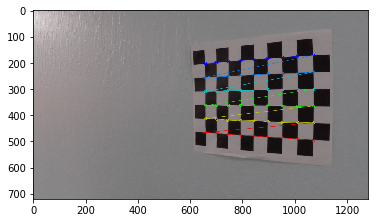

In [5]:
# Compute camera calibration matrix and distortion coefficients given a set of chessboard images

# Prepare object points, like (0,0,0), (1,0,0) ..., (6,5,0)
objp = np.zeros((6*9,3), np.float32)
objp[:,:2] = np.mgrid[0:9, 0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all images
objpoints = [] # 3d points in real world space
imgpoints = [] # 2d points in image plane

# Make a list of calibration images
images = glob.glob('camera_cal/calibration*.jpg')

# Step through the list and search for chessboard corners
for idx, fname in enumerate(images):
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)
    
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        
        # Draw and display corners
        cv2.drawChessboardCorners(img, (9,6), corners, ret)
        # write_name = 'corners_found'+str(idx)+'.jpg'
        # cv2.imwrite(write_name, img)
        plt.imshow(img)

### Calibrate, Calculate Distortion Coefficients and Test Undistortion on an Image

Text(0.5, 1.0, 'Undistorted Image')

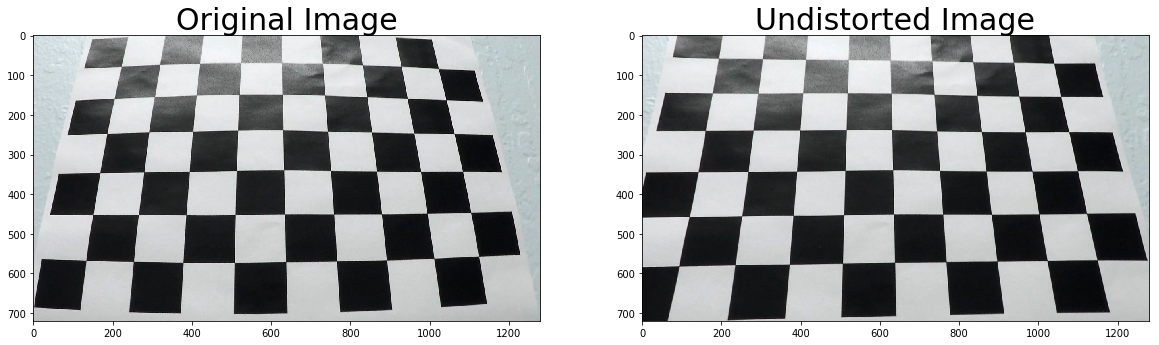

In [9]:
# Test undistortion on an image
img = cv2.imread('camera_cal/calibration3.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('camera_cal/test_undist3.jpg', dst)

# Save the camera calibration result for later use (we won't worry about rvecs/tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open('camera_cal/wide_dist_pickle3.p', 'wb') )

# dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

In [ ]:
## Apply Distortion Correction to Raw Images

Text(0.5, 1.0, 'Undistorted Image')

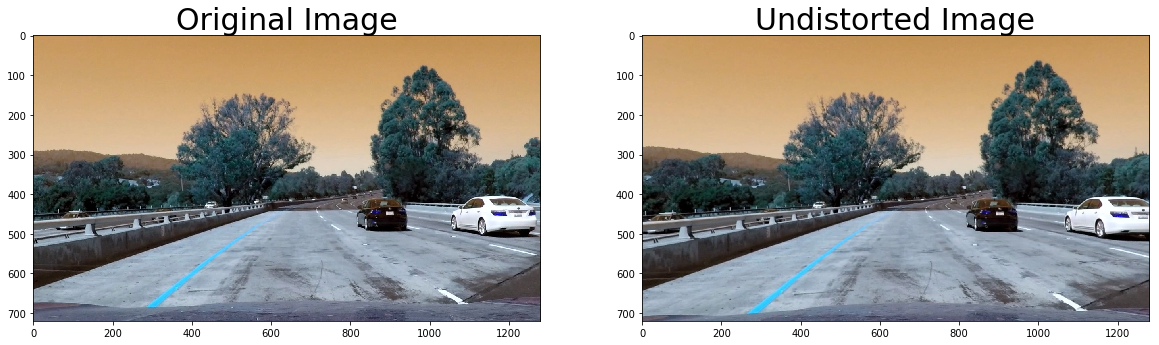

In [10]:
# Test undistortion on an image
img = cv2.imread('test_images/test1.jpg')
img_size = (img.shape[1], img.shape[0])

# Do camera calibration given object points and image points
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None,None)

dst = cv2.undistort(img, mtx, dist, None, mtx)
cv2.imwrite('test_images/test_undist1.jpg', dst)

# Save the camera calibration result for later use (we won't worry about rvecs/tvecs)
dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open('test_images/wide_dist_pickle1.p', 'wb') )

# dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
# Visualize undistortion
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=30)
ax2.imshow(dst)
ax2.set_title('Undistorted Image', fontsize=30)

## Calculating Lane Curvature

In [ ]:
# Driving on a highway, you take a look at the road in front of you 
# and the cars around you. You press the gas or break to go with the flow and
# based on how much the lane is curving left or right, you curve the steering
# wheel to stay in that lane.

# How does this work for a self-driving car?
# Self-Driving cars need to be told the correct steer angle to turn left or 
# right. We can calculate this angle if we know the speed and dynamics
# of the car and how much the lane is curving.

# To Determine the Lane Curvature:
# 1. Detect the Lane Lines using Masking and Thresholding techniques
# 2. Perform a Perspective Transform to get a bird's eye view of the lane
# (which let's us fit a polynomial to the lane lines)
# 3. Extract Lane Curvature from this polynomial using Math

# Lane Curvature Line Fittign Equation:
# f(y) = Ay^2 + By + C
# A gives curvature of lane line
# B gives heading or direction line is pointing
# C gives position of line based on how far away it is from left of an image (y = 0)

